#                                Reducing Employee Churn: 
##                       A data science approach towards Retaining Talent 

This project uses publicly available IBM attrition Dataset to train a machine-learning algorithm for analysing employees who are dissatisfied with their current jobs and are trying to leave. We will train this system of IBM dataset and then test it to predict on our own private dataset of 30 employees with different features than training dataset to test if the models accuracy holds of different companies and different features.

**This data science approach to predict if an employee is trying to quit by his survey responses has the following Advantages:** 

1) **Reduction in overall cost of employee turnover :**
hiring a new employee can be costly it includes 
advertising, interviewing, screening and then hiring. It also incurs on-boarding costs such as  training and management. Further to settle down and do work efficiently employee needs time that adds to loss of productivity time. Retaining existing talent is much more cost efficient.
 
2) **Reducing lost productivity and overhead of existing employees:** 
Before the new employee is hired, though, the open position will probably be covered by other employees, diverting them from their regular work or requiring overtime. Or activity is simply not done. If it’s a sales position, that’s a direct hit to the top line. Longer lead times on products could be costly as well.

3) **Building corporate image: Employees are the face of an organization:**
It’s the satisfaction level of your employees that matters the most. So, if an employee isn’t happy, she might spread a negative word about the organization, even after leaving it. What’s more, is that an unhappy employee will lack motivation and will not perform well, leading to unsatisfactory performance. This results in unachievable performance targets, low profits, and employee churn.

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import dataset for initial training and testing
df=pd.read_csv(r"IBM-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Data shows 1470 rows and 35 columns(34 feature columns 1 target variable "Attrition"). Data doesnt show any missing value. However we need an in-depth analysis of inconsistensis and redundancy in data.

<AxesSubplot:>

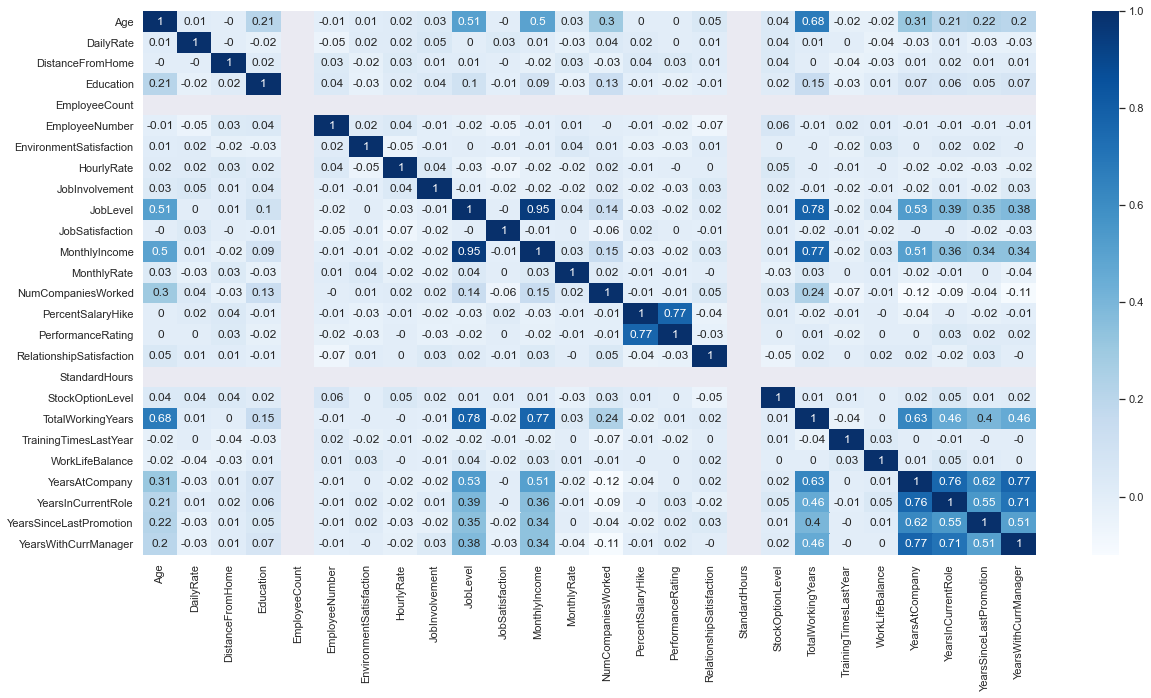

In [22]:
#sns.set(rc={'figure.figsize':(13,10)})
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),2), xticklabels=df.corr().columns,
        yticklabels=df.corr().columns,cmap="Blues", annot=True)

There is a high correlation between "joblevel" and "monthly income". which is plausible as higher your job level, higher income you get..another good correlation is between job level and total working years (more experience tends to better level and hence better monthly income)

Text(0.5, 1.0, 'MonthlyIncomel and TotalWorkingYears')

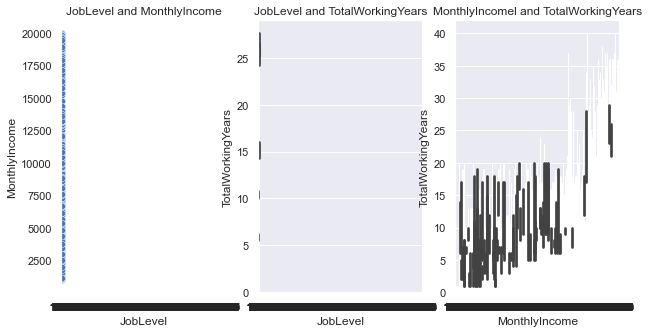

In [27]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,5))

sns.scatterplot(ax=axes[0],x='JobLevel', y='MonthlyIncome', data=df)
axes[0].set_title('JobLevel and MonthlyIncome')

sns.barplot(ax=axes[1], x='JobLevel', y='TotalWorkingYears', data=df)
axes[1].set_title('JobLevel and TotalWorkingYears')

sns.barplot(ax=axes[2], x='MonthlyIncome', y='TotalWorkingYears', data=df)
axes[2].set_title('MonthlyIncomel and TotalWorkingYears')


**Initial Visual Analysis report**

1. Bin into appropriate intervals (using Random forest wont require it)
   * Age
   * distance_from_home ( set a threshold for 2 categories (close and remote))
   * NumCompaniesWorked (bin the number of companies changed based on visualisation where most people left or plan to leave (mode value)...career milestone)
   * PercentSalaryHike
   * TotalWorkingYears 
   * TrainingTimesLastYear
   * YearsAtCompany
   * YearsWithCurrManager

2. Dummy variable(one hot encoding)
   * Attrition(target Variable)
   * Business travel 
   * Department 
   * Education Field
   * Gender 
   * JobRole 
   * MaritalStatus
   * OverTime  

3. Check for redundant info: 
   * Check if*Daily_rate*  *HourlyRate* , *MonthlyIncome*,*MonthlyRate* has some relation and if yes then drop redundant info columns
   * Check YearsInCurrentRole and YearsSinceLastPromotion for any relation

       
4. Drop columns with no info
   * Employee count     
   * Employee number           diff for all(no info) (keep it till last for prediction , dont feed it to model)
   * Over18                    same for all(no info)
   * StandardHours             same for all

In [30]:
encoded_columns = pd.get_dummies(df['Attrition'], drop_first=True, prefix='Attrition')
df = df.join(encoded_columns).drop('Attrition', axis=1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [31]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [32]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [33]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [34]:
#drop 'EmployeeCount','Over18','StandardHours' as they have no new info
df.drop(['EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

In [35]:
#confirm if the columns have been removed
df.shape

(1470, 32)

<AxesSubplot:xlabel='BusinessTravel', ylabel='Count'>

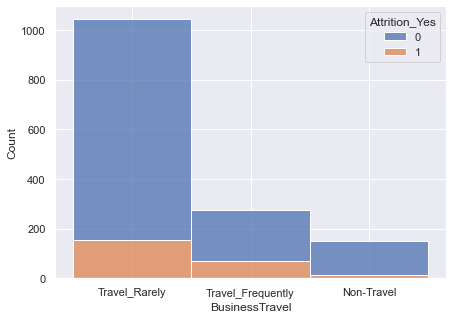

In [52]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='BusinessTravel', hue= 'Attrition_Yes', multiple="stack")

<AxesSubplot:xlabel='PerformanceRating', ylabel='Count'>

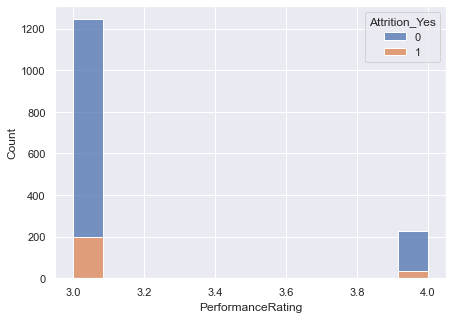

In [51]:
plt.figure(figsize=(7,5))

sns.histplot(data= df, x='PerformanceRating', hue= 'Attrition_Yes', multiple="stack")

In [38]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

just 2 values for performance rating....most people got 3

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Count'>

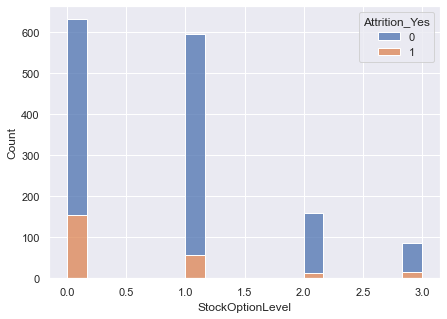

In [54]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='StockOptionLevel', hue= 'Attrition_Yes', multiple="stack")

people with no stock option have higher attrition..

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

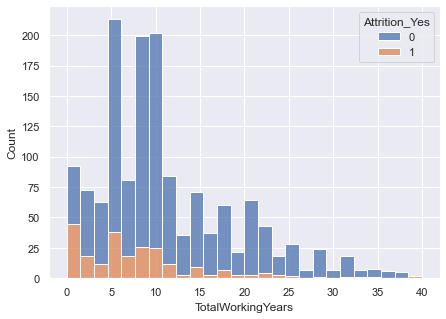

In [55]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='TotalWorkingYears', hue= 'Attrition_Yes', multiple="stack")

attrition is high in employees in their first year of joining, then it again increases around 5th year. and then goes down after 10 or 11 years of work experience.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

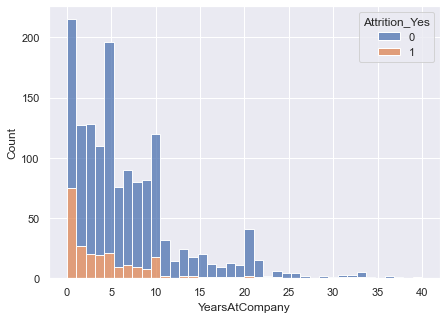

In [56]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='YearsAtCompany', hue= 'Attrition_Yes', multiple="stack")

<AxesSubplot:xlabel='Age', ylabel='Count'>

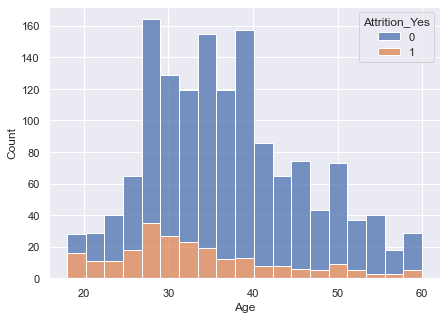

In [57]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='Age', hue= 'Attrition_Yes', multiple="stack")

Age data for attrition is right skewed..people in their early career leave jobs more often as compared to later ones.. attrition is high around age 27-30.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

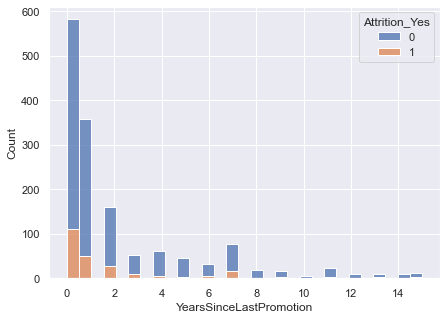

In [58]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='YearsSinceLastPromotion', hue= 'Attrition_Yes', multiple="stack")
#leave just after promotionin 1 or 2 years

Most of the people left job either the same year they got promoted or just an year after that. 

In [29]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [6]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

* is it an unbalanced dataset?????

In [15]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Count'>

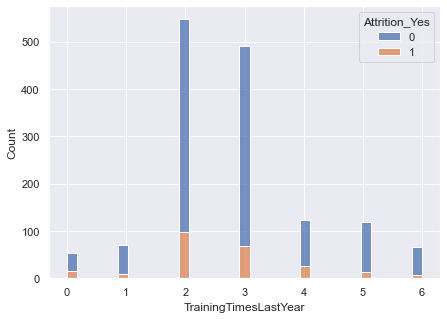

In [61]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='TrainingTimesLastYear', hue= 'Attrition_Yes', multiple="stack")

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

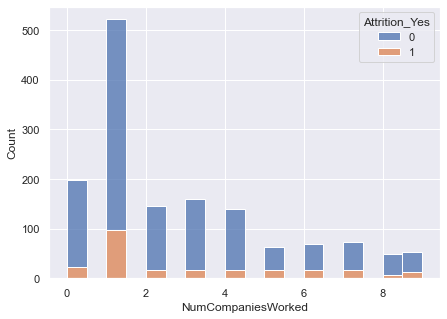

In [64]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='NumCompaniesWorked', hue= 'Attrition_Yes', multiple="stack")
#people with 1 year exp. are more to leave


<AxesSubplot:xlabel='JobLevel', ylabel='Count'>

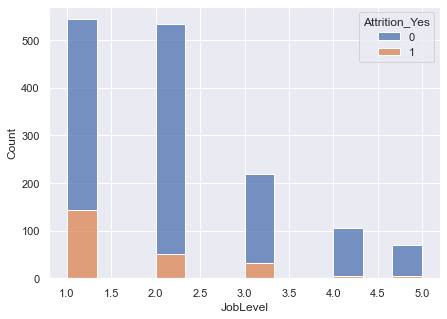

In [65]:
plt.figure(figsize=(7,5))
sns.histplot(data= df, x='JobLevel', hue= 'Attrition_Yes', multiple="stack")
#junior level attrition is more

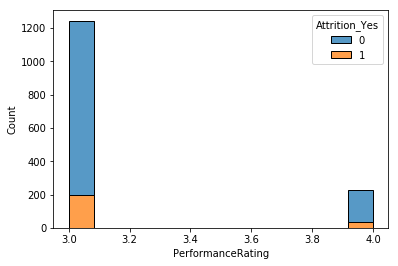

In [37]:
sns.histplot(data= df, x='PerformanceRating', hue= 'Attrition_Yes', multiple="stack")
#lowest rating attrition more

Final summary:
* First we checked for missing values(nan, 0 or any other value by checking unique value counts): None
* we checked outliers: none
* visualised correlation between variables:
 * There is a high correlation between "joblevel" and "monthly income". which is plausible as higher your job level, higher income you get..another good correlation is between job level and total working years (more experience tends to better level and hence better monthly income)
 * columns such as Employeecount, Over18, StandardHours has same value for all employees with no new value so dropped those columns
 * just 2 values for performance rating....most people got 3 (3---4)????
 * people with no stock option have higher attrition..
 * attrition is high in employees in their first year of joining, then it again increases around 5th year. and then goes down after 10 or 11 years of work experience
 * Age data for attrition is right skewed..people in their early career leave jobs more often as compared to later ones.. attrition is high around age 27-30.
 * Most of the people left job either the same year they got promoted or just an year after that.
 * Attrition.value_counts()--yes-1233, no 237...unbalanced??
* converted categorical variables to numerical variables using one hot encoding.